In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import random

from surprise import Reader, Dataset, SVD, evaluate, accuracy
from surprise.model_selection import GridSearchCV, KFold, train_test_split
from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.matrix_factorization import SVDpp

import time

import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [100]:
ratings = pd.read_csv('/Users/user/movielens-20m-dataset/rating.csv')

In [3]:
ratings.shape

(20000263, 4)

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [5]:
movies = pd.read_csv('/Users/user/movielens-20m-dataset/movie.csv')

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies.shape

(27278, 3)

In [8]:
rated_movs = ratings.groupby('movieId').sum()
rated_movs.shape

(26744, 2)

In [9]:
users = ratings.groupby('userId').sum()
users.shape

(138493, 2)

We're looking at 20 million ratings on 26,744 movies, made by 138,493 users.

Text(0.5, 1.0, 'Rating Distribution (all users)')

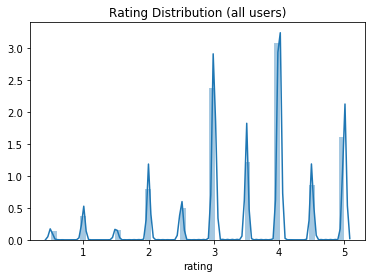

In [227]:
sns.distplot(ratings['rating'])
plt.title('Rating Distribution (all users)')

In [11]:
tags = pd.read_csv('/Users/user/movielens-20m-dataset/tag.csv')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [12]:
genome_tags = pd.read_csv('/Users/user/movielens-20m-dataset/genome_tags.csv')
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [13]:
genome_scores = pd.read_csv('/Users/user/movielens-20m-dataset/genome_scores.csv')
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [14]:
genome_scores.shape

(11709768, 3)

In [15]:
links = pd.read_csv('/Users/user/movielens-20m-dataset/link.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [228]:
ratings.shape

(20000263, 4)

In [17]:
n_users = ratings.userId.unique().shape[0]
n_movies = ratings.movieId.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 138493 | Number of movies = 26744


In [29]:
reader = Reader(rating_scale=(1, 5))

In [31]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [32]:
# define a cross-validation iterator

start = time.time()

kf = KFold(n_splits=5)

algo = SVD(verbose=True)

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    
print("Runtime %0.2f" % (time.time() - start))

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.7862
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.7856
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Proc

In [33]:
algo.predict(345,3954)

Prediction(uid=345, iid=3954, r_ui=None, est=2.953376558090905, details={'was_impossible': False})

In [34]:
ratings[ratings['userId'] == 345]

,userId,movieId,rating,timestamp
44668,345,111,4.0,2006-03-08 14:48:54
44669,345,223,3.0,2006-03-08 14:48:38
44670,345,266,2.0,2006-03-08 14:50:04
44671,345,508,4.5,2006-03-08 14:49:44
44672,345,594,3.0,2006-03-08 14:50:10
44673,345,750,5.0,2006-03-08 14:50:00
44674,345,919,2.0,2006-03-08 14:48:59
44675,345,1101,3.0,2006-03-08 14:50:15
44676,345,1220,3.5,2006-03-08 14:49:55
44677,345,1221,4.0,2006-03-08 14:48:46


In [36]:
ratings[ratings['movieId'] == 3954].head(1)

,userId,movieId,rating,timestamp
90419,632,3954,2.0,2003-04-24 02:18:42


In [71]:
def check_system(Id,movieId,limit,df=ratings,userId='userId',algo=algo):
    user_df = df[df['userId'] == Id]
    rated_movs = user_df['movieId'].tolist()
    #est_list = []
    
    #for i in range(0,len(rated_movs)):
    #    a = round(algo.predict(userId,rated_movs[i]).est,2)
    #    est_list.append(a)
    
    #user_df['est'] = est_list
    user_df['est'] = user_df['movieId'].apply(lambda x: round(algo.predict(Id,x).est,2))
    
    if limit == None:
        return user_df
    
    else:
        return user_df.head(limit)

In [ ]:
runtimes = []

In [76]:
start = time.time()

check_system(345,'movieId',None)

Runtime = time.time() - start
runtimes.append(Runtime)

In [77]:
runtimes 

[27.562493324279785, 8.007270812988281]

In [78]:
check_system(345,'movieId',None)

,userId,movieId,rating,est
44668,345,111,4.0,3.85
44669,345,223,3.0,3.65
44670,345,266,2.0,3.10
44671,345,508,4.5,3.86
44672,345,594,3.0,3.56
44673,345,750,5.0,4.06
44674,345,919,2.0,4.04
44675,345,1101,3.0,3.30
44676,345,1220,3.5,3.77
44677,345,1221,4.0,3.93


# Analysis so far

Our SVD algorithm has a RMSE of 0.7858, which is not bad at all. I'm finding that the ratings tend to be centeralized, leaning toward mean ratings around 3-4 for every movie predicted and I'm wondering if this has to do with the distribution of ratings in the raw data and what we would get if we scaled it down to have a more even number of ratings in each bin.

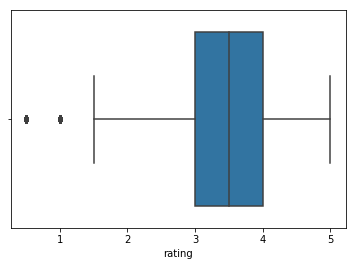

In [80]:
sns.boxplot(ratings['rating'])

Our results tend to fall within the boxplot's allotment for 'mean' ratings, meaning it might not be perfectly specified for users. We'll try training with a more even set.

In [82]:
ratings['rating'].value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

Figuring out how to select these is hard, as having a 1:1 allotment of each rating could seriously skew the data in terms of how many movies we have or how many ratings. But I also want to be able to train the model accurately by letting it have an even number of movies to look at. So we'll pick 100,000 of each if there are more than 1,000,000 ratings, and include all the ratings if there are fewer.


In [87]:
alt_ratings = four_star

In [106]:
sub_sample(3.0,ratings)

In [116]:
alt_ratings = pd.DataFrame()
my_ratings = [4.0,3.0,5.0,3.5,4.5,2.0]
for rating in my_ratings:
    temp_df = ratings[ratings['rating'] == rating]
    temp_df = temp_df.sample(n=1000000)
    alt_ratings = pd.concat([alt_ratings,temp_df],axis=0)

In [117]:
alt_ratings.shape

(6000000, 3)

In [112]:
alt_ratings = alt_ratings.drop('timestamp',axis=1)
ratings = ratings.drop('timestamp',axis=1)

In [118]:
ratings_left = [2.5,1.0,1.5,0.5]
for rating in ratings_left:
    temp_df = ratings[ratings['rating'] == rating]
    alt_ratings = pd.concat([alt_ratings,temp_df],axis=0)

In [119]:
alt_ratings['rating'].value_counts()

5.0    1000000
4.5    1000000
4.0    1000000
3.5    1000000
3.0    1000000
2.0    1000000
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

Now we have 1,000,000 ratings each of 5-2, and all the previous ratings of 2.5 stars to 0.5 stars. I am curious about how many users or movies we lost, and since we subsampled, I'm a little worried about not having enough data per user. Let's take a look.

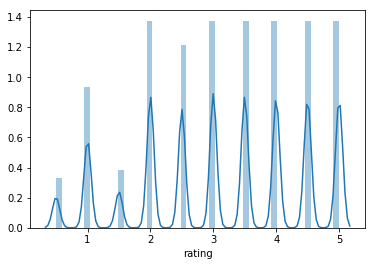

In [122]:
sns.distplot(alt_ratings['rating'])

In [123]:
data = Dataset.load_from_df(alt_ratings[['userId', 'movieId', 'rating']], reader)

In [124]:
# define a cross-validation iterator

start = time.time()

kf = KFold(n_splits=5)

svd = SVD(verbose=True)

for trainset, testset in kf.split(data):

    # train and test algorithm.
    svd.fit(trainset)
    alt_pred = svd.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(alt_pred, verbose=True)
    
print("Runtime %0.2f" % (time.time() - start))

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.9437
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.9433
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Proc

In [138]:
ratings['userId'].value_counts().mean()

144.4135299257002

In [192]:
def check_system(Id,movieId,limit,df=ratings,userId='userId',algo=algo):
    user_df = df[df['userId'] == Id]
    if user_df.shape[0] >= df[userId].value_counts().mean():
        user_df = user_df.sample(frac=.10)
    else:
        user_df = user_df.sample(frac=.50)
    #rated_movs = user_df['movieId'].tolist()
    #est_list = []
    
    #for i in range(0,len(rated_movs)):
    #    a = round(algo.predict(userId,rated_movs[i]).est,2)
    #    est_list.append(a)
    
    #user_df['est'] = est_list
    user_df = pd.merge(user_df,movies_df,on=movieId)
    user_df['est'] = user_df['movieId'].apply(lambda x: round(algo.predict(Id,x).est,2))
    user_df['error'] = user_df['est']-user_df['rating']
    user_df['avg_error'] = user_df['error'].mean()
    
    if limit == None:
        return user_df[[userId,movieId,'title','rating','est','error','avg_error']]
    else:
        if limit >= user_df.shape[0]:
            return user_df[[userId,movieId,'title','rating','est','error','avg_error']]
        else:
            return user_df[[userId,movieId,'title','rating','est','error','avg_error']].head(limit)

In [193]:
check_system(46470,'movieId',20,df=alt_ratings,userId='userId',algo=svd)

,userId,movieId,title,rating,est,error,avg_error
0,46470,96863,"Paperboy, The (2012)",0.5,1.00,0.50,0.106595
1,46470,8362,Raising Helen (2004),2.0,1.85,-0.15,0.106595
2,46470,6702,Dickie Roberts: Former Child Star (2003),2.0,1.88,-0.12,0.106595
3,46470,5665,Knockaround Guys (2002),1.0,1.54,0.54,0.106595
4,46470,480,Jurassic Park (1993),2.5,4.52,2.02,0.106595
5,46470,6587,Gigli (2003),1.0,1.00,0.00,0.106595
6,46470,1286,Somewhere in Time (1980),2.5,2.04,-0.46,0.106595
7,46470,7213,Divorce American Style (1967),1.0,2.04,1.04,0.106595
8,46470,3105,Awakenings (1990),2.5,2.48,-0.02,0.106595
9,46470,1739,3 Ninjas: High Noon On Mega Mountain (1998),0.5,1.00,0.50,0.106595


In [146]:
check_system(46470,'movieId',20)

,userId,movieId,rating,est,error,avg_error
6754102,46470,104074,1.5,1.43,-0.07,-0.118582
6751047,46470,2261,0.5,2.24,1.74,-0.118582
6751050,46470,2266,0.5,1.77,1.27,-0.118582
6751601,46470,3785,2.0,1.80,-0.20,-0.118582
6750991,46470,2115,5.0,3.48,-1.52,-0.118582
6751100,46470,2375,3.0,1.82,-1.18,-0.118582
6750333,46470,364,5.0,3.86,-1.14,-0.118582
6750614,46470,1129,4.0,2.71,-1.29,-0.118582
6753934,46470,94780,3.0,2.76,-0.24,-0.118582
6752252,46470,6275,0.5,1.68,1.18,-0.118582


In [168]:
movies_df = pd.read_csv('/Users/user/movielens-20m-dataset/movie.csv')
movies_df = movies_df[['movieId','title']]
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [169]:
ratings = pd.merge(ratings,movies_df,on='movieId')
ratings.head()

,userId,movieId,rating,title
0,1,2,3.5,Jumanji (1995)
1,5,2,3.0,Jumanji (1995)
2,13,2,3.0,Jumanji (1995)
3,29,2,3.0,Jumanji (1995)
4,34,2,3.0,Jumanji (1995)


In [189]:
def predict_ratings(Id, movieId, n, df=ratings, userId='userId', algo=algo):
    # Select some random movies from our set
    movie_choices = df[movieId].unique()
    movies = np.random.choice(movie_choices,n)
    
    # Build the dataframe that we'll return
    predicted_df = pd.DataFrame()
    predicted_df['movieId'] = movies
    predicted_df['userId'] = Id
    
    predicted_df['est'] = predicted_df['movieId'].apply(lambda x: round(algo.predict(Id,x).est,2))
    
    # Grabbing the titles
    predicted_df = pd.merge(predicted_df,movies_df,on='movieId')
    
    
    return predicted_df[[userId,movieId,'title','est']]

In [190]:
predict_ratings(453,'movieId',20)

,userId,movieId,title,est
0,453,5880,Extreme Ops (2002),2.66
1,453,5039,Dragonslayer (1981),3.74
2,453,91673,Albert Nobbs (2011),3.65
3,453,25885,"Prelude to War (Why We Fight, 1) (1943)",3.57
4,453,27253,"Extremely Goofy Movie, An (2000)",3.22
5,453,32395,Attack of the Mushroom People (Matango) (1963),3.40
6,453,32088,DNA (1997),2.67
7,453,86653,"Sky's the Limit, The (1943)",3.60
8,453,76085,Trash (1970),3.58
9,453,1861,Junk Mail (Budbringeren) (1997),3.42


In [224]:
def predicted_top_n(Id, movieId, n, samples, df=ratings, userId='userId', algo=algo):
    '''
    This function returns n movies, sorted by predicted user rating, from a random sample of movies. 
    '''
    
    # Select random movies according to 'samples'
    movie_choices = df[movieId].unique()
    if samples == None:
        movies = df[movieId].unique()
        samples = movies.shape[0]
    elif samples >= movie_choices.shape[0]:
         movies = np.random.choice(movie_choices,samples)
    else:
        movies = df[movieId].unique()
        
    # Build the dataframe that we'll return
    predicted_df = pd.DataFrame()
    predicted_df[movieId] = movies
    predicted_df[userId] = Id
    predicted_df['est'] = predicted_df[movieId].apply(lambda x: round(algo.predict(Id,x).est,2))
    predicted_df = predicted_df.sort_values(by='est', ascending=False)
    
    if n >= samples:
        predicted_df = pd.merge(predicted_df,movies_df,on=movieId)
        return predicted_df[[userId,'title','est']]
    else:
        predicted_df = predicted_df.head(n)
        predicted_df = pd.merge(predicted_df,movies_df,on=movieId)
        return predicted_df[[userId,'title','est']]

In [225]:
predicted_top_n(345, 'movieId', 20, None)

,userId,title,est
0,345,Bill Hicks: Revelations (1993),4.30
1,345,Presto (2008),4.28
2,345,Connections (1978),4.27
3,345,Frozen Planet (2011),4.25
4,345,Fires on the Plain (Nobi) (1959),4.23
5,345,Fawlty Towers (1975-1979),4.23
6,345,One Man Band (2005),4.23
7,345,It's Such a Beautiful Day (2012),4.22
8,345,"Shawshank Redemption, The (1994)",4.22
9,345,"Princess Bride, The (1987)",4.21


In [226]:
predicted_top_n(873, 'movieId', 20, None)

,userId,title,est
0,873,Pi (1998),5.00
1,873,Pulp Fiction (1994),5.00
2,873,Dancer in the Dark (2000),5.00
3,873,Fear and Loathing in Las Vegas (1998),5.00
4,873,Trainspotting (1996),5.00
5,873,Eternal Sunshine of the Spotless Mind (2004),5.00
6,873,Lost in Translation (2003),5.00
7,873,City of God (Cidade de Deus) (2002),5.00
8,873,Kill Bill: Vol. 1 (2003),5.00
9,873,"Science of Sleep, The (La science des rêves) (...",5.00
